<a href="https://colab.research.google.com/github/nagae/ICL_B_2021/blob/main/duration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# jp_df から特定の期間内のデータだけをとりだす
[`pandas.DataFrame.xs`関数](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html)に [`slice`関数](https://docs.python.org/ja/3/library/functions.html#slice)を使うと，特定の期間内のデータだけを取り出すことができる.
その際 `drop_level=False` というオプションを与えれば，日付のインデックスが落ちない．

たとえば，`jp_df`の中から2021年1月1日〜31日のデータだけを抜き出して `p1_df` というデータフレームに格納するには，以下のようにする：
```
p1_df = jp_df.xs(slice('2021-01-01', '2021-01-31'), level='年月日', drop_level=False)
```

In [2]:
# 必要なモジュールのインポート
import numpy as np # 行列計算
import pandas as pd # データベース
from matplotlib import pyplot as plt, dates as mdates # グラフ描画
import datetime # 日付
# ファイルを読み込み，列名を使いやすい形に修正
fname = 'https://toyokeizai.net/sp/visual/tko/covid19/csv/prefectures.csv'
jp_df = pd.read_csv(fname, dtype=str)
jp_df.columns = [ "年", "月" , "日", "都道府県", "Pref", "陽性数", "検査数", "入院数", "重症数", "退院数", "死亡数", "実効再生産数"]
# 都道府県名以外の全てのセルを整数値に変換する
for c in jp_df.columns:
    if c in ["都道府県", "Pref"]: # 都道府県名のデータは文字型として扱う
        jp_df[c] = jp_df[c].astype(str)
    else:
        jp_df[c] = pd.to_numeric(jp_df[c], errors='coerce') # 都道府県名以外のデータは数値として扱う
        jp_df[c] = jp_df[c].fillna(0) # データが欠損している部分を0で埋める
        jp_df[c] = jp_df[c].astype(float) # 一旦は実数型に変換する 
        if c not in ["実効再生産数"]: # 実効再生産数以外のデータは整数型として扱う
            jp_df[c] = jp_df[c].astype(int)

# 年月日の列からdatetime型のインデックスを生成する
jp_df["年月日"] = pd.to_datetime(jp_df[["年", "月", "日"]].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
# 都道府県名と年月日からなるマルチインデックスを構築
jp_df = jp_df.set_index(["都道府県", "年月日"])
jp_df # jp_df の概観を表示

,,年,月,日,Pref,陽性数,検査数,入院数,重症数,退院数,死亡数,実効再生産数
都道府県,年月日,,,,,,,,,,,
東京都,2020-02-08,2020,2,8,Tokyo,3,0,0,0,0,0,0.00
神奈川県,2020-02-08,2020,2,8,Kanagawa,1,0,0,0,0,0,0.00
東京都,2020-02-09,2020,2,9,Tokyo,3,0,0,0,0,0,0.00
神奈川県,2020-02-09,2020,2,9,Kanagawa,1,0,0,0,0,0,0.00
東京都,2020-02-10,2020,2,10,Tokyo,3,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
熊本県,2021-05-19,2021,5,19,Kumamoto,5485,74137,912,21,4484,89,0.98
大分県,2021-05-19,2021,5,19,Oita,3011,134662,661,6,2313,37,0.90
宮崎県,2021-05-19,2021,5,19,Miyazaki,2887,38333,354,5,2499,25,0.54


In [10]:
# 2つの期間を指定
period1 = ('2021-01-01', '2021-01-31')
period2 = ('2021-04-01', '2021-05-01')
p1_df = jp_df.xs(slice(*period1), level='年月日', drop_level=False) # period1 に対するデータ
p2_df = jp_df.xs(slice(*period2), level='年月日', drop_level=False) # period2 に対するデータ

In [11]:
conf1 = p1_df["陽性数"].groupby('年月日').sum() # period1 の陽性数
conf2 = p2_df["陽性数"].groupby('年月日').sum() # period1 の陽性数

Text(0.5, 1.0, 'new daily confirmed: 2021-04-01 - 2021-05-01')

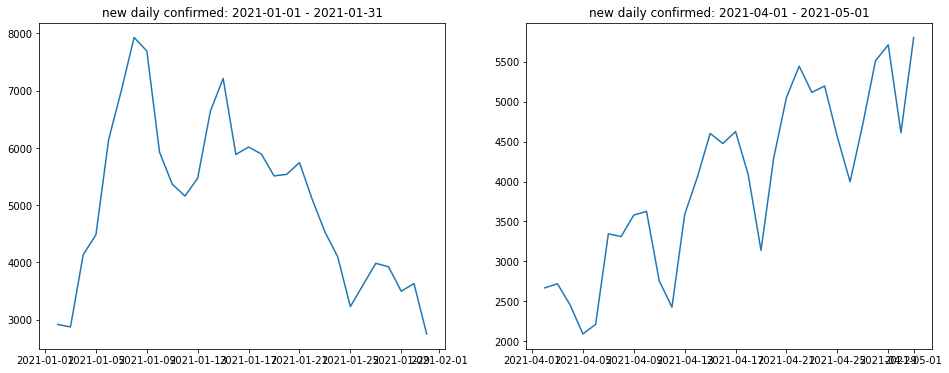

In [16]:
fig, ax = plt.subplots(1,2,figsize=(8*2,6))
ax[0].plot(conf1.diff()) # period1 の日次新規陽性数
ax[0].set_title('new daily confirmed: {} - {}'.format(*period1))
ax[1].plot(conf2.diff()) # period2 の日次新規陽性数
ax[1].set_title('new daily confirmed: {} - {}'.format(*period2))
